# STOCK MARKET PRICE PREDICTION - ARIMA

In [1]:
import sys
print (sys.version)
print(sys.executable)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
C:\Users\akash\anaconda3\python.exe


## 1.Federal Bank

### Importing libraries and  also defined a matplotlib style of fivethirtyeight for plots

In [2]:
import pandas as pd
import numpy as np
import itertools

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Importing of Dataset from the diectory

In [3]:
df = pd.read_csv('D://Dataset//FEDERALBNK.BO.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,23.770000,23.795,23.379999,23.580000,8.429377,724800
1,2010-01-05,23.900000,24.170,23.650000,23.920000,8.550918,1556550
2,2010-01-06,24.190001,24.650,24.100000,24.379999,8.715360,1034000
3,2010-01-07,24.610001,24.990,24.405001,24.565001,8.781491,1360420
4,2010-01-08,24.790001,25.100,24.605000,24.760000,8.851200,1886220


### Removing columns,Sorted the data by date and checking of missing values

In [4]:
df.Date = pd.to_datetime(df.Date, format='%Y%m%d', errors='ignore')
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('Date')
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [5]:
df['Date'].min()

'2010-01-04'

In [6]:
df['Date'].max()

'2019-12-31'

### Creating Date coloumn as index

In [7]:
df = df.set_index('Date')
df.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
       '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31'],
      dtype='object', name='Date', length=2461)

### Preprocessing of Data
#### Weekly data is tricky to work and it take more time.So instead of using weekly data, we used averages of monthly data of Close Price and made conversion with resample()

In [8]:
df.index = pd.to_datetime(df.index)
monthly_mean = df.Close.resample('M').mean()

In [9]:
#Creating monthly mean from 2010
monthly_mean['2010':]

Date
2010-01-31    25.496053
2010-02-28    25.214211
2010-03-31    26.134524
2010-04-30    28.136500
2010-05-31    30.180952
                ...    
2019-08-31    84.662500
2019-09-30    87.584210
2019-10-31    84.005264
2019-11-30    86.380000
2019-12-31    86.176191
Freq: M, Name: Close, Length: 120, dtype: float64

### Creating Time series data as Data Visualization

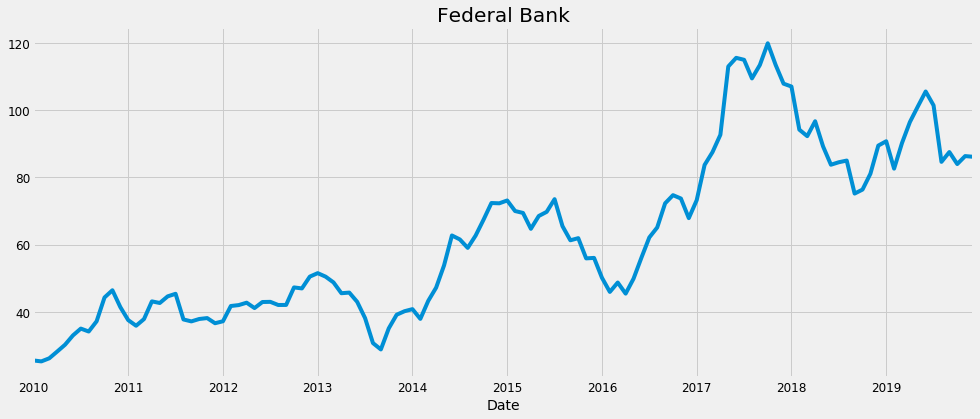

In [10]:
#Plotting the monthly mean
monthly_mean.plot(figsize=(15, 6), title = 'Federal Bank')
plt.show()

#### Some distinguishable patterns appears so the time-series has seasonality pattern

### Visualising the Distinct components of Data: Trend ,Seasonality and Noise


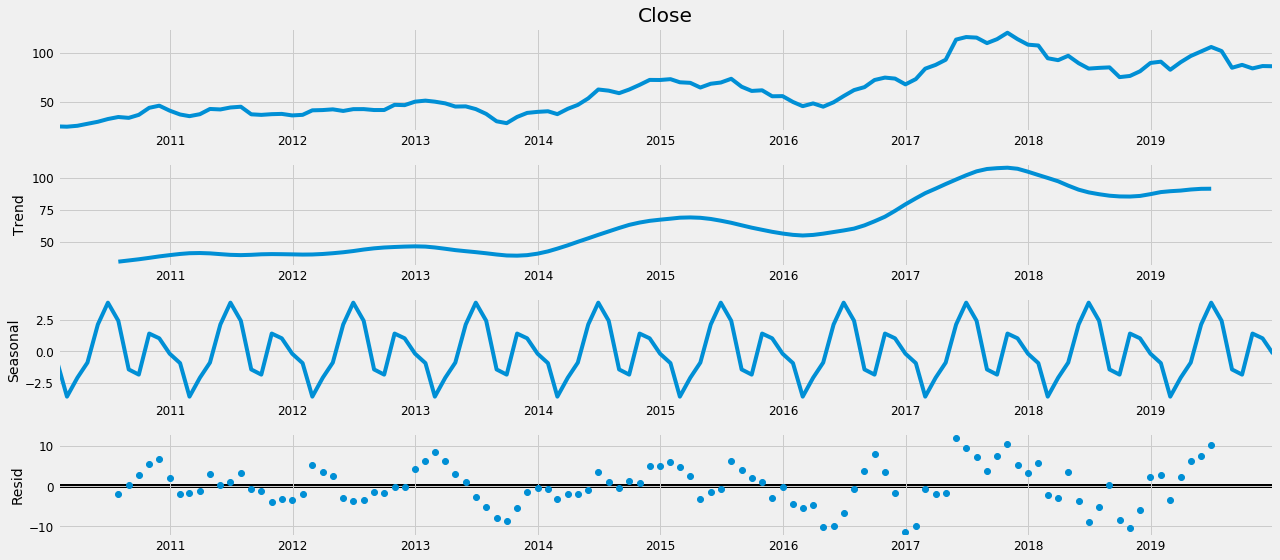

In [11]:
# Visualising the Distinct components: trend, seasonality, and noise.
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

#### The figure shows the close price is unstable

### ARIMA TIME SERIES MODEL

#### There are three distinct integers (p, d, q) that are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA(p, d, q).
#### p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model.
#### d is the integrated part of the model. It allows the number of past time points to subtract from the current value to apply to the time series.
#### q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.
#### Here we are dealing with Seasonal Seasonal effect, Seasonal ARIMA defined as ARIMA(p,d,q)(P,D,Q)s. The term s is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods).

In [12]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

import warnings
warnings.filterwarnings("ignore")

l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print("\n\n")
print(results.summary().tables[0])

print(results.summary().tables[1])

print(results.summary().tables[2])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1341.532878031808
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1140.417729132343
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:967.6521703699503
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:853.1119544072204
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:976.5622578538663
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:902.0785117939969
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:853.907124361406
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:847.9681508699273
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1181.4938677120826
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:998.4879254348855
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:840.4613256062195
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:739.4210733036805
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:857.1764307677878
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:847.2510820508321
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:748.3413741234879
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:735.4304566384415
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:715.353459928783
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:650.8459474766746
ARIMA(0, 1,

#### Using grid search, Identified the set of parameters that produces the best fitting model to our time series data.

### Plot Diagnostics

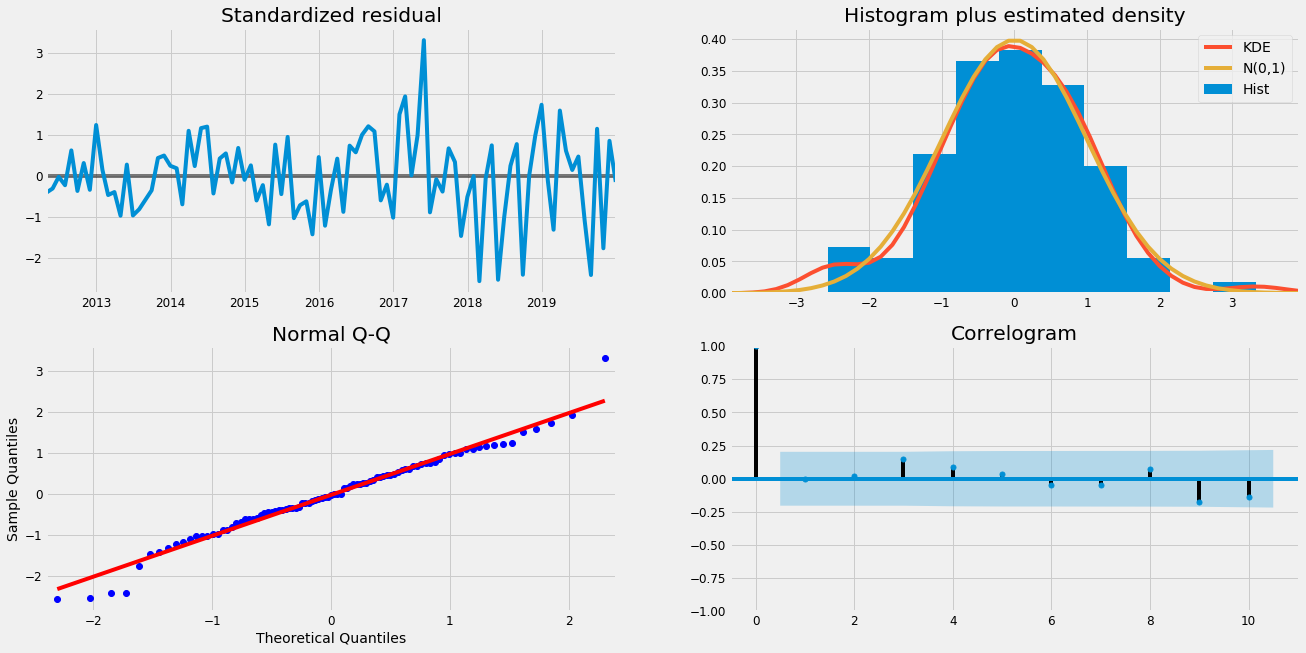

In [13]:
#Plotting the diagnostics results
results.plot_diagnostics(figsize=(20, 10))
plt.show()

#### Histogram plus estimated density shows the red line of KDE follows closely with the N(0,1) where in stands for standard notation with standard deviation 1 and mean 0. 
#### In the Q-Q Plot shows that blue dots follow the trend of standard normal distribution. 
#### The standard residual does not show any obvious seasonality and it is confirmed by the correlogram plot. 
#### In the Correlogram plot time series residual have low correlation.

### Prediction and Forecasting Graph

#### By comparing forecast values to real time series value. It helps us to understand the prediction accuracy. 
#### The attribute get_prediction() and coef_int() which helps to get the values and confidence interval for time series prediction. 
#### The dynamic = FALSE argument which means the forecast are generated at each point using the entire history.

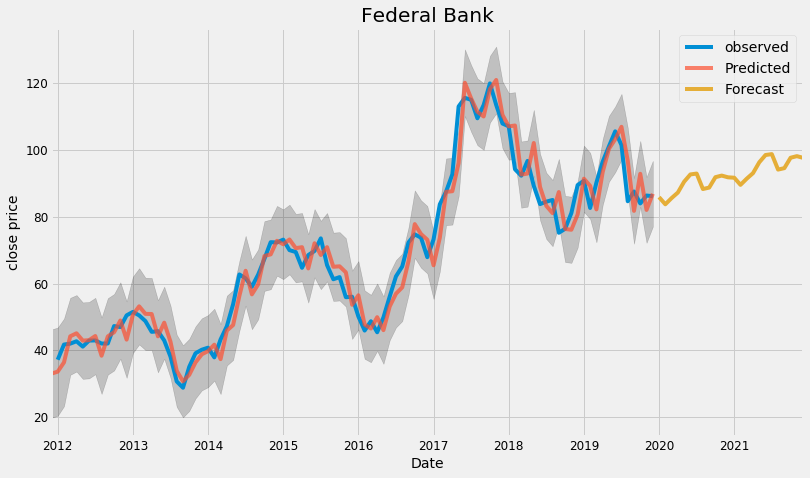

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2011-12-31'), dynamic=False)
pred_uc = results.get_forecast(steps=24)
pred_ci = pred.conf_int()


ax = monthly_mean['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(12, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.title('Federal Bank')
ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()

### Forecast Validation

#### In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors. The MSE is a measure of the quality of an estimator. it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.
#### Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily close price in the test set within portion of the real close price.

In [15]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2011-12-31':]

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_truth, y_forecasted))
print('Mean Squared Error:', metrics.mean_squared_error(y_truth, y_forecasted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_truth, y_forecasted)))

Mean Absolute Error: 4.014757690134823
Mean Squared Error: 26.10177673992103
Root Mean Squared Error: 5.108989796419741


## 2.ICICI Bank

In [16]:
import pandas as pd
import numpy as np
import itertools

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [17]:
df = pd.read_csv('D://Dataset//ICICIBANK.BO.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,161.455002,163.608994,159.218002,159.800003,85.270287,1924434
1,2010-01-05,162.000000,162.526993,160.455002,161.373001,86.109665,2999596
2,2010-01-06,162.509003,164.964005,161.817993,162.755005,86.847115,4112664
3,2010-01-07,162.718002,162.727005,159.455002,160.955002,85.886604,1834883
4,2010-01-08,161.455002,161.817993,158.190994,158.873001,84.775642,2535022


In [18]:
#removing columns,sorted by date and checking the missing values
df.Date = pd.to_datetime(df.Date, format='%Y%m%d', errors='ignore')
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('Date')
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [19]:
df['Date'].min()

'2010-01-04'

In [20]:
df['Date'].max()

'2019-12-31'

In [21]:
#creating Date coloumn as index
df = df.set_index('Date')
df.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
       '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31'],
      dtype='object', name='Date', length=2461)

In [22]:
df.index = pd.to_datetime(df.index)
monthly_mean = df.Close.resample('M').mean()

In [23]:
#Creating monthly mean from 2010
monthly_mean['2010':]

Date
2010-01-31    154.902001
2010-02-28    150.832578
2010-03-31    169.372762
2010-04-30    173.208150
2010-05-31    160.056189
                 ...    
2019-08-31    411.887500
2019-09-30    412.923685
2019-10-31    441.394734
2019-11-30    492.875002
2019-12-31    534.511906
Freq: M, Name: Close, Length: 120, dtype: float64

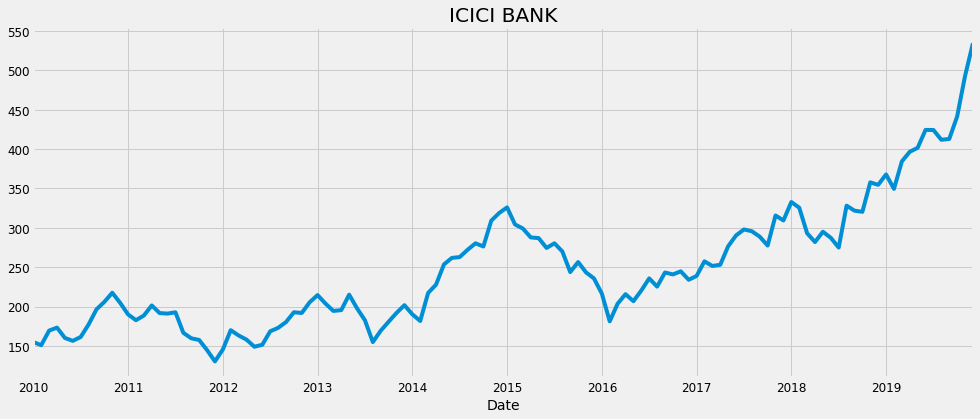

In [24]:
#Plotting the monthly mean
monthly_mean.plot(figsize=(15, 6), title = 'ICICI BANK')
plt.show()

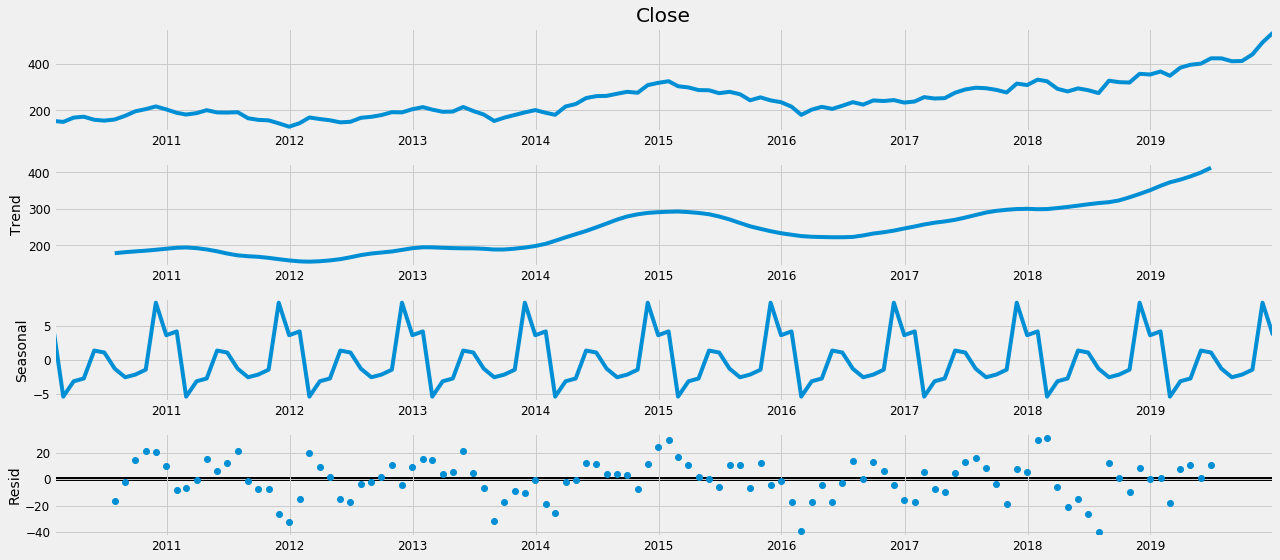

In [25]:
# Visualising the Distinct components: trend, seasonality, and noise.
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [26]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

import warnings
warnings.filterwarnings("ignore")

l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print("\n\n")
print(results.summary().tables[0])

print(results.summary().tables[1])

print(results.summary().tables[2])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1664.3978425949804
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1419.4789811223006
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1202.7912279600605
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1074.178581103208
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1197.9174031726575
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1141.0967559866858
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1083.5404979256655
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1070.9834817924448
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1504.2106830194386
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1275.127446639142
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1077.588505620368
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:962.4786429800674
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1085.8201290271102
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1030.2258540138039
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:982.2561699773496
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:964.4663618717076
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1003.8702492158811
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:909.2971891677541

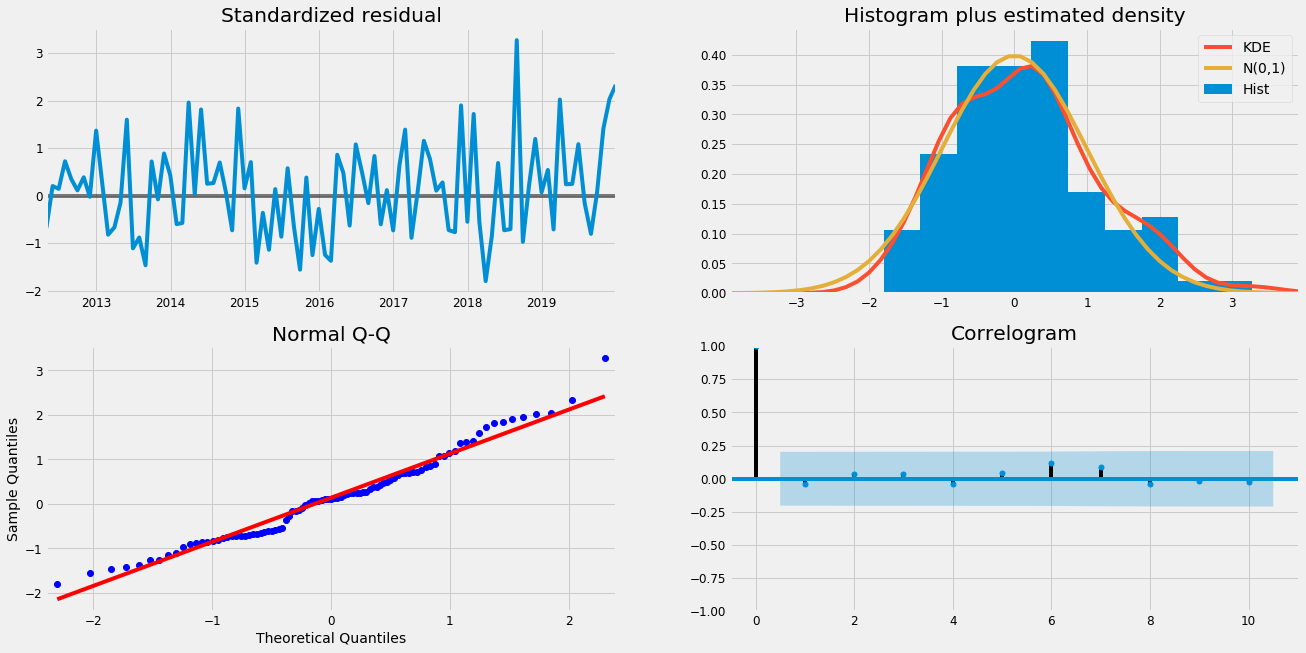

In [27]:
#Plotting the diagnostics results
results.plot_diagnostics(figsize=(20, 10))
plt.show()

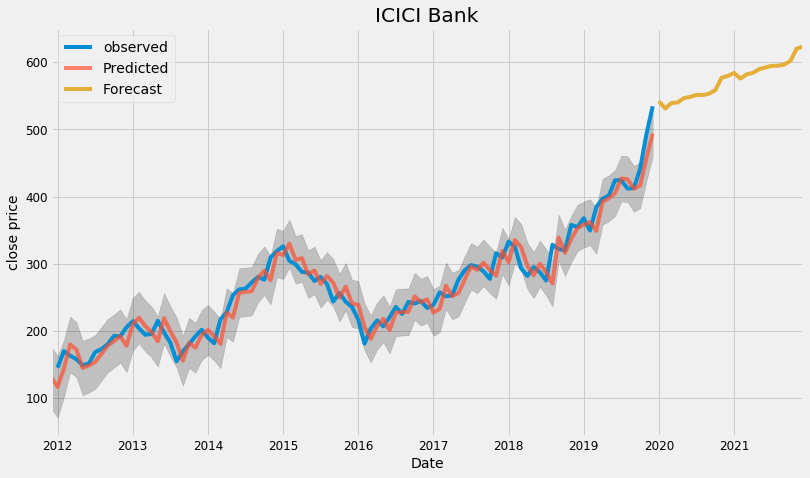

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2011-12-31'), dynamic=False)
pred_uc = results.get_forecast(steps=24)
pred_ci = pred.conf_int()


ax = monthly_mean['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(12, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.title('ICICI Bank')
ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()

In [29]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2011-12-31':]

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_truth, y_forecasted))
print('Mean Squared Error:', metrics.mean_squared_error(y_truth, y_forecasted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_truth, y_forecasted)))

Mean Absolute Error: 14.500844790493142
Mean Squared Error: 329.98612643763096
Root Mean Squared Error: 18.1655202633349


## 3. Canara Bank

In [30]:
import pandas as pd
import numpy as np
import itertools

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [31]:
df = pd.read_csv('D://Dataset//CANBK.BO.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,381.289001,388.097992,376.765991,387.076996,321.910095,58279
1,2010-01-05,390.286011,395.878998,389.071014,394.712006,328.259674,95281
2,2010-01-06,394.907013,400.354004,389.071014,396.268005,329.553772,68622
3,2010-01-07,396.851990,401.229004,394.954987,399.964996,332.628326,66019
4,2010-01-08,402.687988,402.687988,390.092010,393.106995,326.924927,41554


In [32]:
#removing columns,sorted by date and checking the missing values
df.Date = pd.to_datetime(df.Date, format='%Y%m%d', errors='ignore')
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('Date')
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [33]:
df['Date'].min()

'2010-01-04'

In [34]:
df['Date'].max()

'2019-12-31'

In [35]:
#creating Date coloumn as index
df = df.set_index('Date')
df.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
       '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31'],
      dtype='object', name='Date', length=2461)

In [36]:
df.index = pd.to_datetime(df.index)
monthly_mean = df.Close.resample('M').mean()

In [37]:
#Creating monthly mean from 2010
monthly_mean['2010':]

Date
2010-01-31    384.409527
2010-02-28    376.581896
2010-03-31    399.797856
2010-04-30    400.523900
2010-05-31    408.172142
                 ...    
2019-08-31    225.652501
2019-09-30    196.705264
2019-10-31    186.063158
2019-11-30    214.135001
2019-12-31    221.330952
Freq: M, Name: Close, Length: 120, dtype: float64

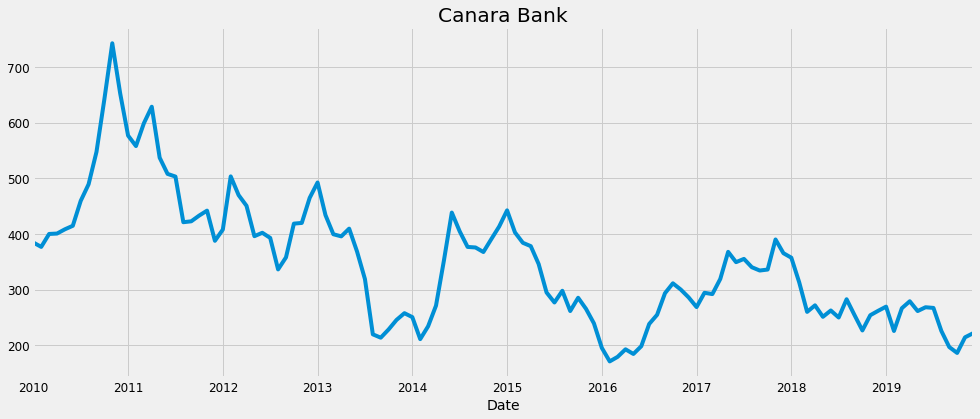

In [38]:
#Plotting the monthly mean
monthly_mean.plot(figsize=(15, 6),title = 'Canara Bank')
plt.show()

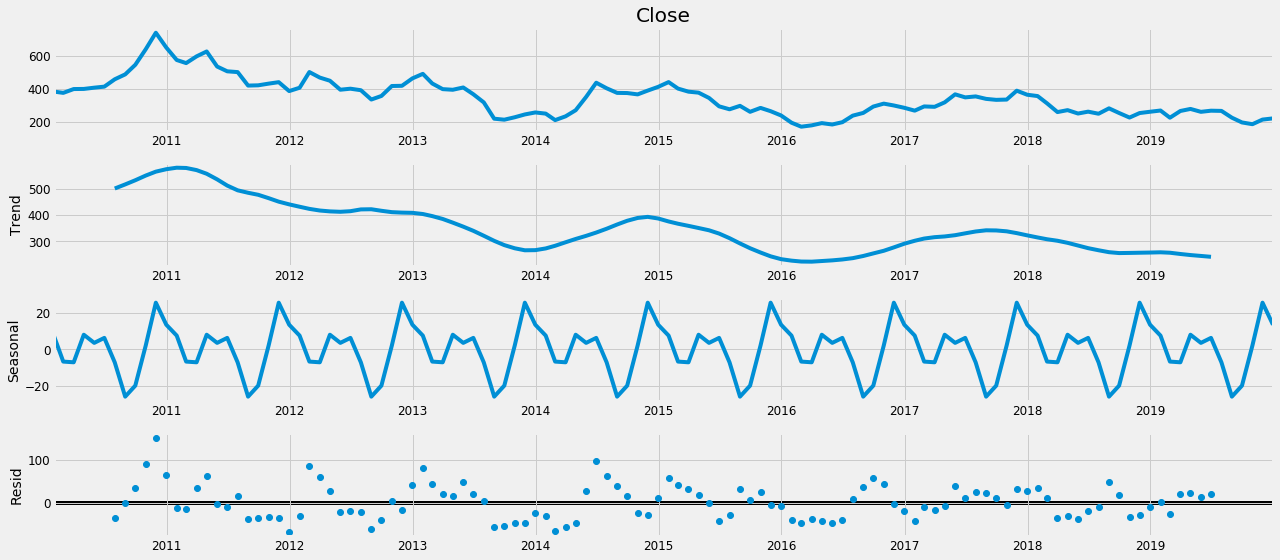

In [39]:
# Visualising the Distinct components: trend, seasonality, and noise.
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [40]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

import warnings
warnings.filterwarnings("ignore")

l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print("\n\n")
print(results.summary().tables[0])

print(results.summary().tables[1])

print(results.summary().tables[2])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1744.62611371724
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1483.108424776971
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1339.8001763630734
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1152.8898143783379
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1336.9433638643093
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1262.6702085696013
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1156.6587459255852
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1146.61934328468
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1577.736242040664
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1334.7650736092728
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1217.9410171867141
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1049.3819739102107
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1228.1373925850712
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1147.4373323624895
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1069.7863111420922
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1046.0065507977213
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1193.9383708640705
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1057.219828953088

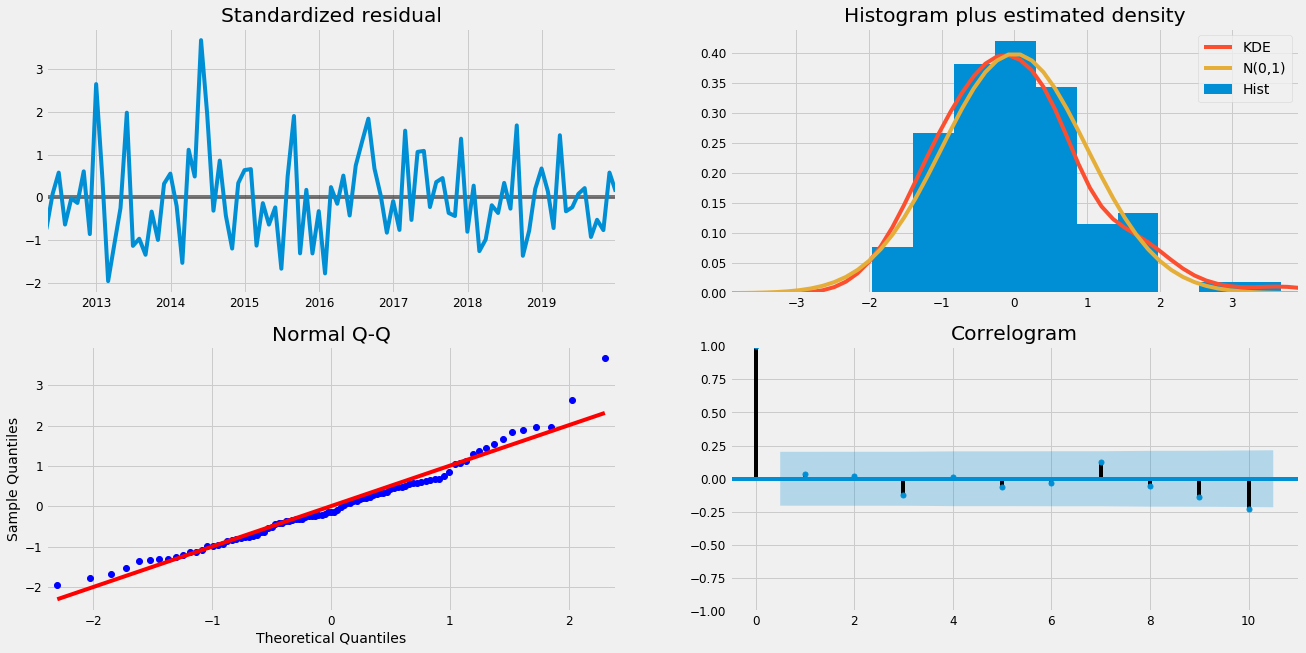

In [41]:
#Plotting the diagnostics results
results.plot_diagnostics(figsize=(20, 10))
plt.show()

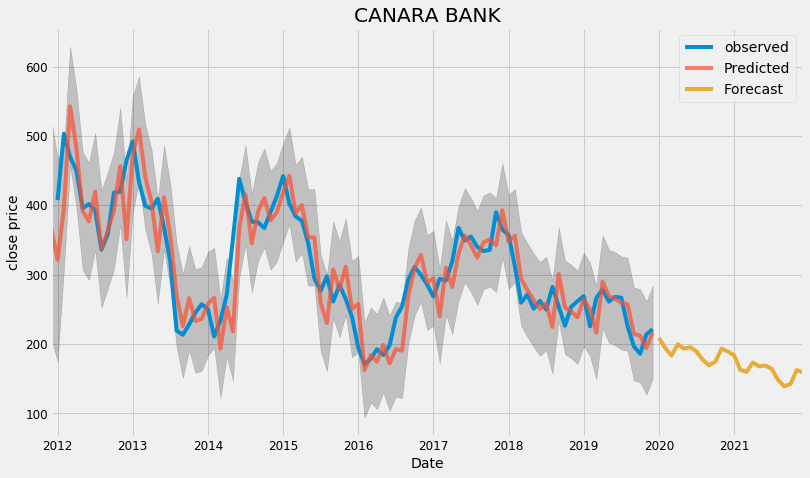

In [42]:
pred = results.get_prediction(start=pd.to_datetime('2011-12-31'), dynamic=False)
pred_uc = results.get_forecast(steps=24)
pred_ci = pred.conf_int()


ax = monthly_mean['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(12, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.title('CANARA BANK')
ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()

In [43]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2011-12-31':]

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_truth, y_forecasted))
print('Mean Squared Error:', metrics.mean_squared_error(y_truth, y_forecasted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_truth, y_forecasted)))

Mean Absolute Error: 30.111556884594464
Mean Squared Error: 1557.0224462191634
Root Mean Squared Error: 39.45912373861289


## 4. Axis Bank

In [44]:
import pandas as pd
import numpy as np
import itertools

import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [45]:
df = pd.read_csv('D://Dataset//AXISBANK.BO.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,199.800003,199.800003,197.600006,198.610001,133.602966,658270
1,2010-01-05,200.199997,203.770004,199.399994,202.000000,135.883392,1105750
2,2010-01-06,203.330002,204.000000,198.429993,199.059998,133.905655,815055
3,2010-01-07,200.000000,201.000000,197.800003,200.589996,134.934906,1123435
4,2010-01-08,201.800003,203.660004,199.399994,202.710007,136.360977,1219710


In [46]:
#removing columns,sorted by date and checking the missing values
df.Date = pd.to_datetime(df.Date, format='%Y%m%d', errors='ignore')
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('Date')
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [47]:
df['Date'].min()

'2010-01-04'

In [48]:
df['Date'].max()

'2019-12-31'

In [49]:
#creating Date coloumn as index
df = df.set_index('Date')
df.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-23',
       '2019-12-24', '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31'],
      dtype='object', name='Date', length=2461)

In [50]:
df.index = pd.to_datetime(df.index)
monthly_mean = df.Close.resample('M').mean()

In [51]:
#Creating monthly mean from 2010
monthly_mean['2010':]

Date
2010-01-31    207.482632
2010-02-28    212.575263
2010-03-31    229.984286
2010-04-30    240.511500
2010-05-31    246.682381
                 ...    
2019-08-31    668.500006
2019-09-30    673.336840
2019-10-31    697.955268
2019-11-30    737.499994
2019-12-31    738.464286
Freq: M, Name: Close, Length: 120, dtype: float64

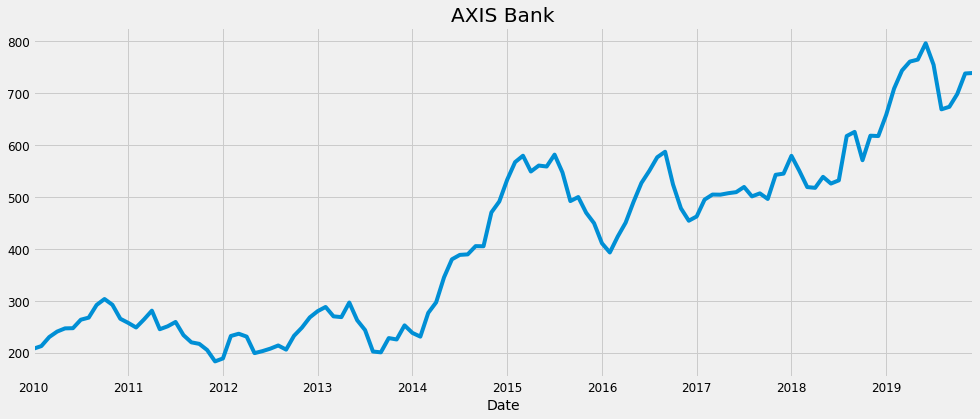

In [52]:
#Plotting the monthly mean
monthly_mean.plot(figsize=(15, 6), title = 'AXIS Bank')
plt.show()

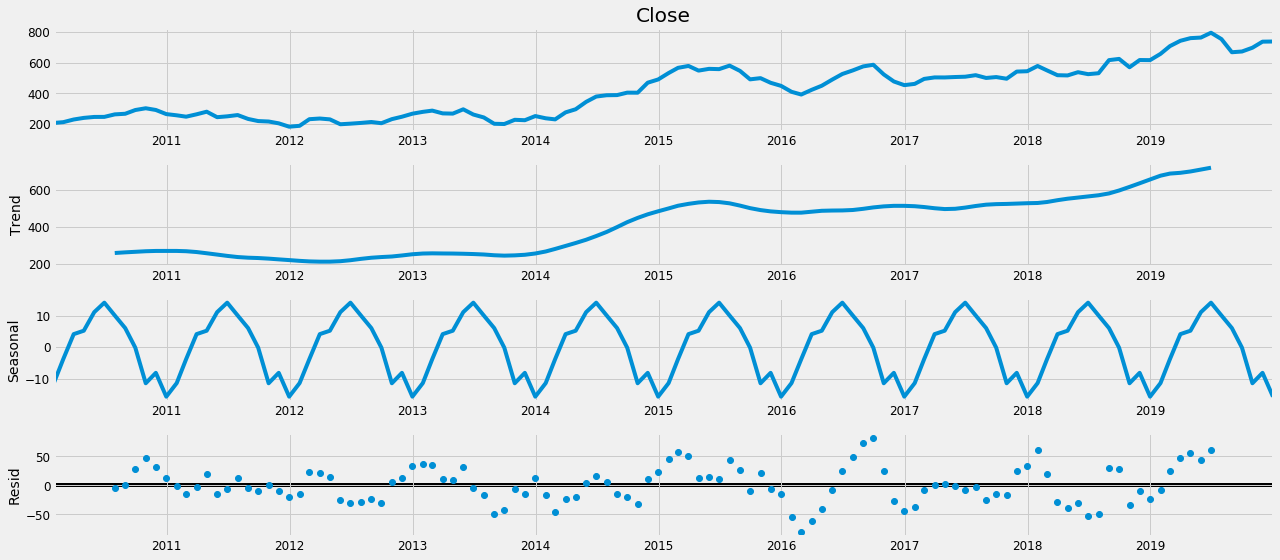

In [53]:
# Visualising the Distinct components: trend, seasonality, and noise.
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [54]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

import warnings
warnings.filterwarnings("ignore")

l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print("\n\n")
print(results.summary().tables[0])

print(results.summary().tables[1])

print(results.summary().tables[2])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1793.598660415209
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1537.8007890223269
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1323.01026719188
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1185.3147924076868
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1317.3400210013042
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1262.4295455693796
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1196.8588353766681
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1182.0454905249826
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1629.226224325777
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1390.691979544786
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1196.1225972607679
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1070.1619964979573
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1206.0378933327913
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1145.3560283219172
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1092.1316555779579
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1070.0465272883785
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1120.5134526030956
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1013.79892270057

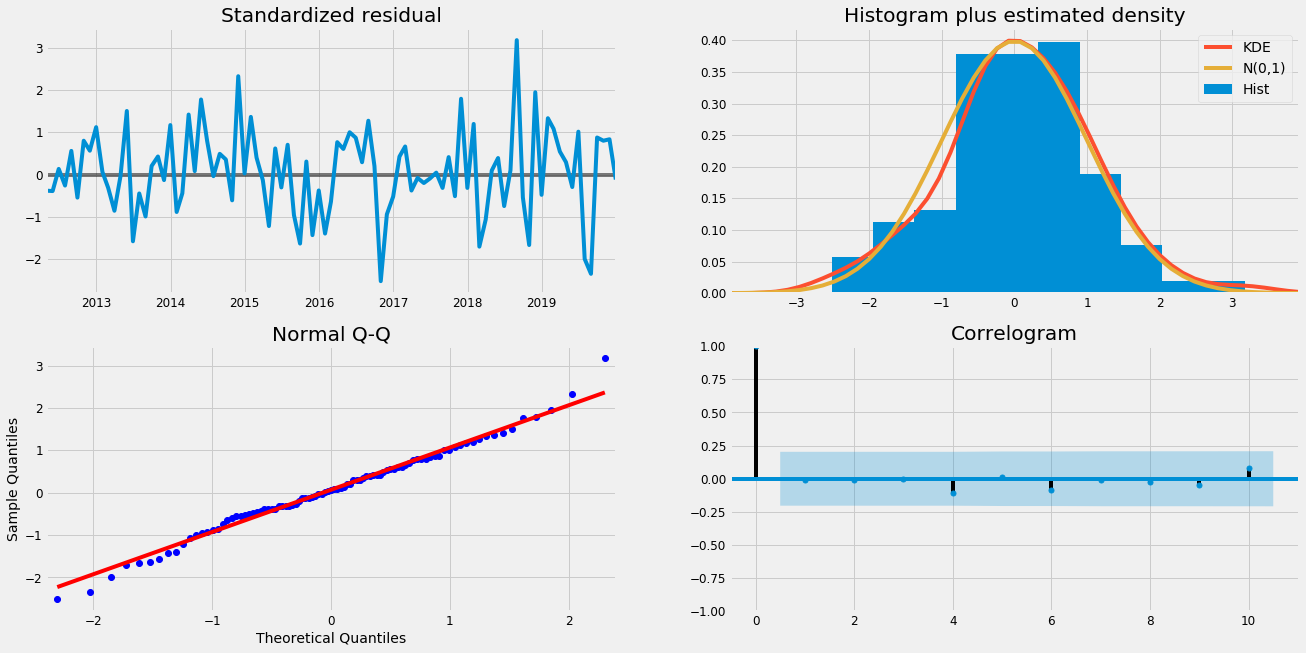

In [55]:
#Plotting the diagnostics results
results.plot_diagnostics(figsize=(20, 10))
plt.show()

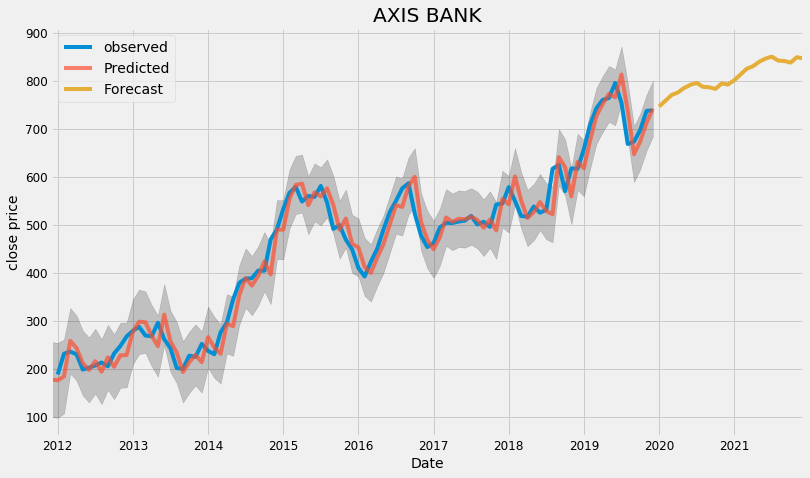

In [56]:
pred = results.get_prediction(start=pd.to_datetime('2011-12-31'), dynamic=False)
pred_uc = results.get_forecast(steps=24)
pred_ci = pred.conf_int()


ax = monthly_mean['2012':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(12, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.title('AXIS BANK')
ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()

plt.show()

In [57]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2011-12-31':]

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_truth, y_forecasted))
print('Mean Squared Error:', metrics.mean_squared_error(y_truth, y_forecasted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_truth, y_forecasted)))

Mean Absolute Error: 23.812250802812173
Mean Squared Error: 933.8209108428855
Root Mean Squared Error: 30.558483451291973
